In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
from pyballmapper import BallMapper

In [3]:
print("loading jones")
jones_df = pd.read_csv("../data/Jones_upto_15_MIRRORS.csv.zip")
print(jones_df.shape)

loading jones
(626462, 59)


In [4]:
X = jones_df[jones_df.columns[8:]].to_numpy()
y = jones_df[["number_of_crossings", "is_alternating", "signature"]]

In [5]:
orbits = []

for i in range(0, len(X), 2):
    orbits.append([i, i + 1])
    orbits.append([i + 1, i])

## MoBM homfly

In [6]:
print()
print("read homfly")
homfly_df = pd.read_csv("../data/HomflyPt_upto_15_MIRRORS.csv.zip")
print(homfly_df.shape)


read homfly
(626462, 158)


In [7]:
X_h = homfly_df[homfly_df.columns[6:]].to_numpy()

In [8]:
homfly_df[homfly_df.columns[6:]]

,a18_z0,a18_z2,a18_z4,a18_z6,a18_z8,a18_z10,a18_z12,a18_z14,a16_z0,a16_z2,...,a-16_z12,a-16_z14,a-18_z0,a-18_z2,a-18_z4,a-18_z6,a-18_z8,a-18_z10,a-18_z12,a-18_z14
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
626458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
626459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
626460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from pyballmapper.mobm import MapperonBallMapper

In [11]:
j_eps = 50
eps_db = 30
print("Running MoBM with eps_BM = {} and eps_DBSCAN = {}".format(j_eps, eps_db))

print("computing Jones BM")
jones_BM = BallMapper(X, eps=50, verbose="tqdm")


# based on scikit's DBSCAN, can consume quite a lot of memory
# the pkl file with the output is provided
print("running Mapper on BallMapper")
mobm = MapperonBallMapper(
    cover_BM=jones_BM,
    target_space=X_h,
    eps=eps_db,
    min_samples=1,
    dbscan_metric="euclidean",
    sparse=True,
    dbg=True,
)

with open("pkl/mobm_{}_{}.pkl".format(j_eps, eps_db), "wb") as f:
    pickle.dump(mobm, f)

In [25]:
with open("pkl/mobm_{}_{}.pkl".format(j_eps, eps_db), "rb") as f:
    mobm = pickle.load(f)

<Axes: >

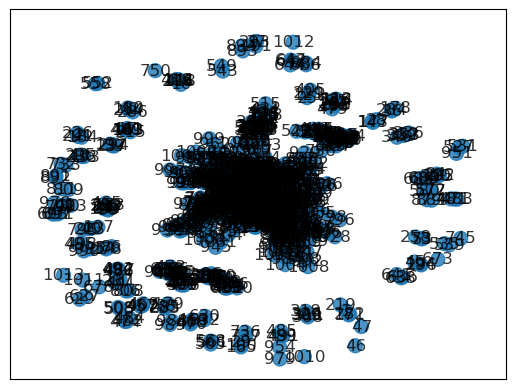

In [26]:
mobm.draw_networkx()

### Plotting

In [27]:
from pyballmapper.plotting import graph_GUI
from bokeh.plotting import show
from matplotlib import colormaps as cm

In [28]:
coloring_df = homfly_df[
    ["number_of_crossings", "is_alternating", "signature", "s_invariant"]
].copy()

In [29]:
my_palette = cm.get_cmap("jet")

mobm.add_coloring(coloring_df=coloring_df)

for node in mobm.Graph.nodes:
    del mobm.Graph.nodes[node]["points covered"]

mobm_gui = graph_GUI(
    mobm.Graph,
    my_palette,
    tooltips_variables=coloring_df.columns,
    render_iterations=1000,
)
mobm_gui.color_by_variable("signature")

color by variable signature 
MIN_VALUE: -14.000, MAX_VALUE: 14.000


(-14.0, 14.0)

In [30]:
show(mobm_gui.plot)